
# SET-UP #



In [ ]:
!pip install transformers
!pip install pyLDAvis
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
import re
import csv
import numpy as np
import pandas as pd
import urllib.request
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.special import softmax

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

# Reading Files #

In [ ]:
#Read file
datafile = open('Brain sentiment.csv', 'r')
myreader = csv.reader(datafile)
negative=0
neutral=0
positive=0
#Open to write to new file
with open('Brain sentiment sorted.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        #Get number of negative/neutral/positive
        if l == 'negative':
          negative = negative+1
        elif l == 'neutral':         
          neutral = neutral+1
        else:
          positive = positive+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Negative:",negative)
print("Neutral",neutral)
print("Positive",positive)

Negative: 955
Neutral 156
Positive 13


In [ ]:
#Read file
datafile = open('Dietary sentiment.csv', 'r')
myreader = csv.reader(datafile)
negative=0
neutral=0
positive=0
#Open to write to new file
with open('Dietary sentiment sorted.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        #Get number of negative/neutral/positive
        if l == 'negative':
          negative = negative+1
        elif l == 'neutral':         
          neutral = neutral+1
        else:
          positive = positive+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Negative:",negative)
print("Neutral",neutral)
print("Positive",positive)

Negative: 394
Neutral 819
Positive 4


# Sort Results #

In [ ]:
# Nested list to sort sentiment to demographic
nested =[
    #Level 2
    [
        #Level 3 and 4
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
    ]
    ,
    [
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
        ,
        [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
    ]
]

In [ ]:
braintest = pd.read_csv('Brain sentiment sorted.csv')
dietarytest = pd.read_csv('Dietary sentiment sorted.csv')

In [ ]:
def sorter(braintest, nested,L1=0):
    #Number of options per columns
    var_opt = [5,5,4,11,7,6,5]

    #Column number
    col_num = 4

    opt_num = 0
    i = 0
    #Nested layer number
    L2=0
    L3=-1
    L4=0
    
    #Loop through column 4-9
    while col_num <= 10:
        #Loop through all rows per column
        for index, row in braintest.iterrows():
            #Loop no. of options and loop number of times
            while opt_num <= var_opt[i]:
                #Check col_num variable with current option number
                if row[col_num] == opt_num:
                    #If true; check if it is negative, neutral or positive and add +1 to counter
                    if row[23] == 'negative':
                        nested[L1][L2][L3][L4] = nested[L1][L2][L3][L4] + 1
                        opt_num += 1
                    elif row[23] == 'neutral':
                        L4 = 1
                        nested[L1][L2][L3][L4] = nested[L1][L2][L3][L4] + 1
                        opt_num += 1
                    else:
                        L4 = 2
                        nested[L1][L2][L3][L4] = nested[L1][L2][L3][L4] + 1
                        opt_num += 1
                    L4 = 0
                else:
                    #If false; add 1 and check next option number
                    opt_num += 1
                    L3 = L3 + 1
            opt_num = 0
            L3=-1
        L2 += 1
        col_num += 1
        i += 1
    return nested

In [ ]:
first_sort = sorter(braintest, nested)
print(first_sort)

In [ ]:
second_sort = sorter(dietarytest,nested,L1=1)
print(second_sort)

	Variables	Negative	Neutral	Positive
 	16-39	0	0	0
	40-49	31	91	0
	50-65	181	387	3
	66-74	133	244	1
	75+	49	96	0
 	Northern Ireland	41	106	0
	Republic of Ireland	93	193	1
	Scotland	46	105	0
	England	208	390	3
	Wales	6	24	0
 	Male	80	167	1
	Female	312	643	3
	Non-Binary	0	1	0
	No Responses	2	8	0
 	White	384	799	4
	Chinese	1	1	0
	Irish Traveler	0	0	0
	Indian	0	2	0
	Pakistani	0	0	0
	Black Caribbean 	0	0	0
	Black African	0	0	0
	Black Other	0	0	0
	Mixed Ethnic Group	2	3	0
	Other Ethnicity Group	3	6	0
	No Answer	4	8	0
 	Full-Time	66	175	0
	Part-Time	48	119	0
	Self-Employment	26	53	2
	Unemployment	12	23	0
	Retired	216	398	2
	Others	22	34	0
	No Answer	4	16	0
 	Primary or below	158	317	2
	Secondary	59	155	4
	Tertiary	68	125	0
	Degree	147	295	0
	Above Degree	106	223	0
	No Answer	4	12	0
 	No Response	158	317	2
	Inactive	52	99	0
	Moderately Inactive	67	142	0
	Moderately Active	84	204	1
	Active	33	56	1


# Pearson Correlation Coefficient #

In [ ]:
nesArray1 = np.array([0, 0, 0,77, 16, 0,456, 78, 9,314, 44, 3,108, 18, 0, 97, 25, 0,220, 28, 3,121, 20, 2,501, 80, 7,16, 3, 0, 205, 24, 2,742, 131, 9,0, 0, 0,8, 1, 1, 931, 152, 11,1, 0, 0,0, 0, 0,2, 0, 0,0, 0, 0,0, 0, 0,0, 0, 0,0, 0, 0,6, 0, 0,6, 2, 0,9, 2, 1, 169, 31, 2,126, 24, 0,63, 7, 3,27, 6, 1,515, 78, 5,44, 8, 0,11, 2, 1, 20, 0, 0,143, 29, 6,150, 28, 0,363, 44, 3,261, 54, 2,18, 1, 1, 381, 59, 5,114, 16, 0,167, 27, 2,221, 41, 2,72, 13, 3])
nesArray2 = np.array([0, 0, 0, 31, 91, 0, 181, 387, 3, 133, 244, 1, 49, 96, 0, 41, 106, 0, 93, 193, 1, 46, 104, 0, 208, 390, 3, 6, 25, 0, 80, 166, 1, 312, 643, 3, 0, 1, 0, 2, 8, 0, 384, 798, 4, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 6, 0, 4, 8, 0, 66, 175, 0, 48, 119, 0, 26, 53, 2, 12, 23, 0, 216, 398, 2, 22, 34, 0, 4, 16, 0, 10, 8, 0, 59, 155, 4, 68, 125, 0, 147, 295, 0, 106, 223, 0, 4, 12, 0, 158, 317, 2, 52, 99, 0, 67, 142, 0, 84, 204, 1, 33, 56, 1])

print(np.corrcoef(nesArray1, nesArray2))
#Left number is correlation
#Right number is p-value(significance)
pearsonr(nesArray1, nesArray2)

[[1.         0.48280305]
 [0.48280305 1.        ]]


(0.48280305189519324, 6.853485791067794e-09)

# Plot #

Plot sentiment to demographic

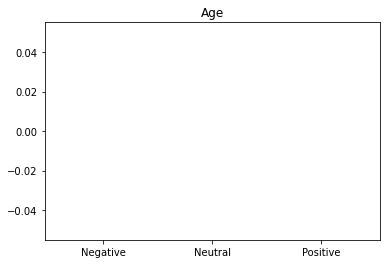

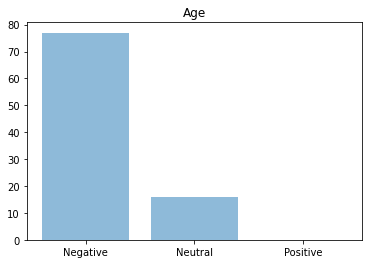

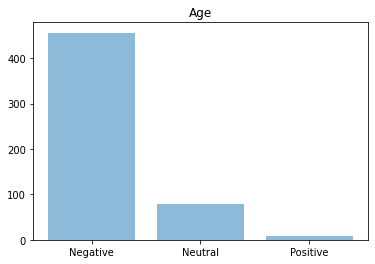

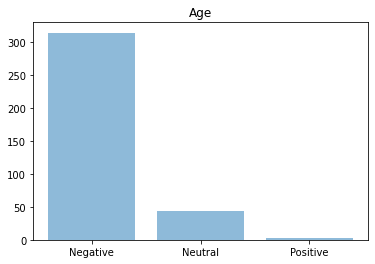

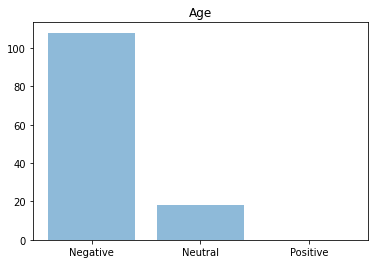

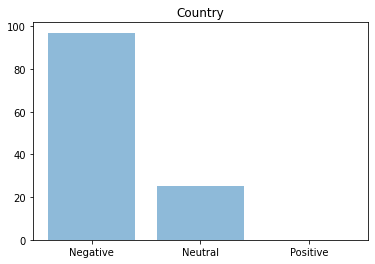

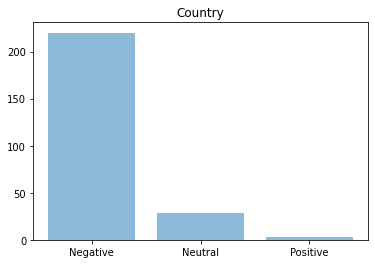

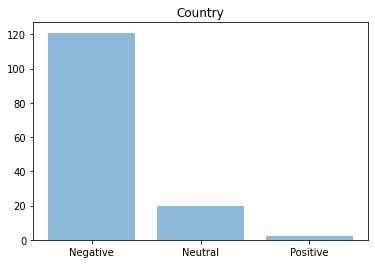

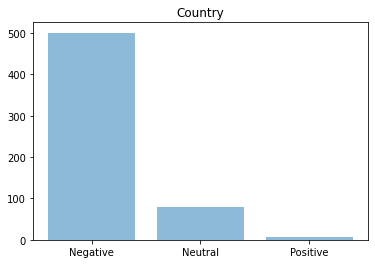

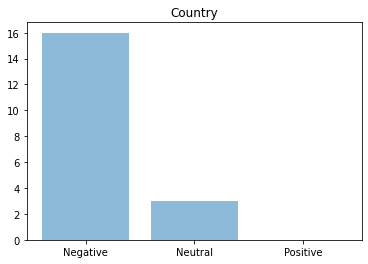

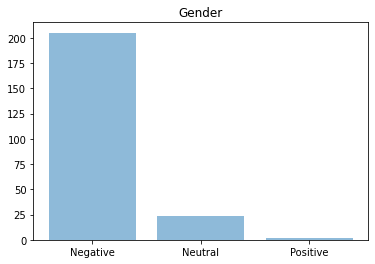

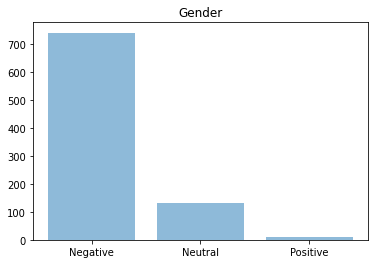

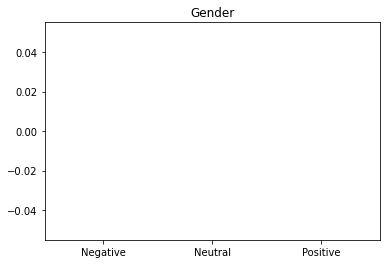

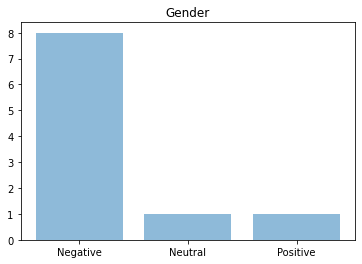

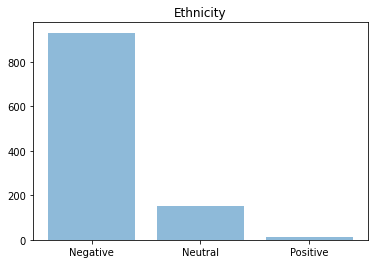

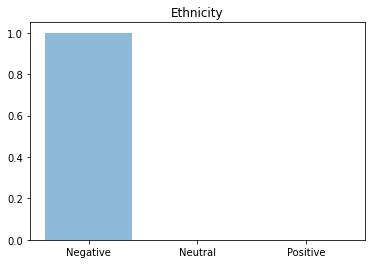

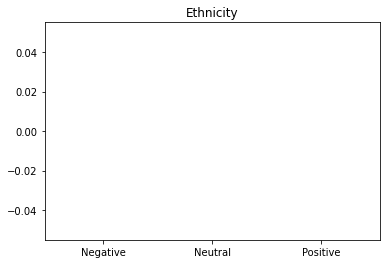

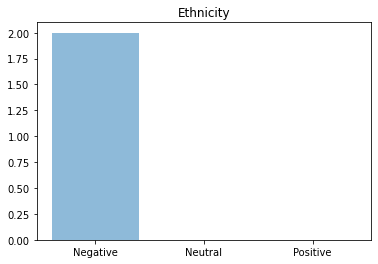

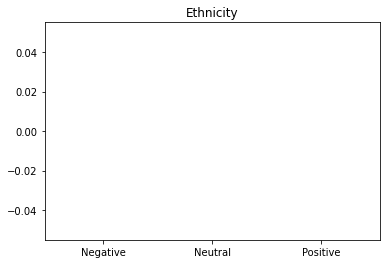

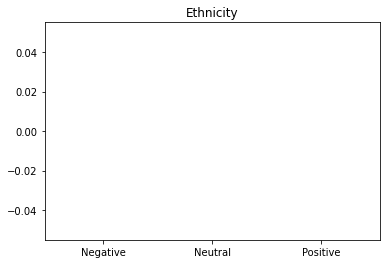

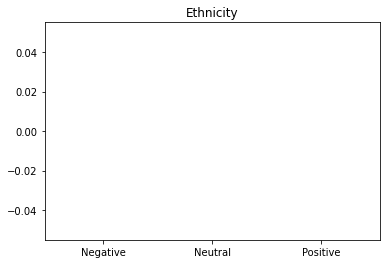

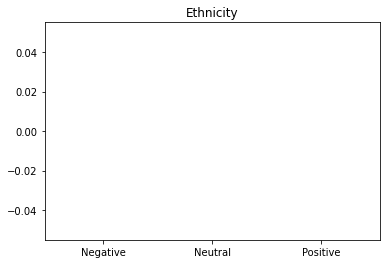

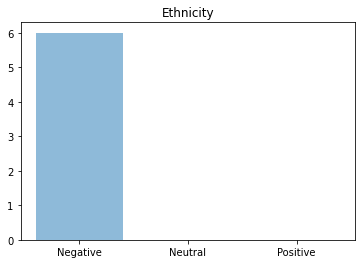

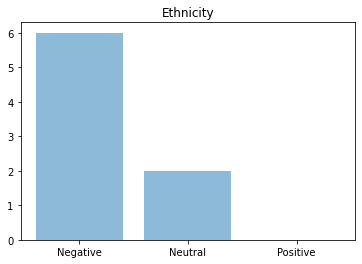

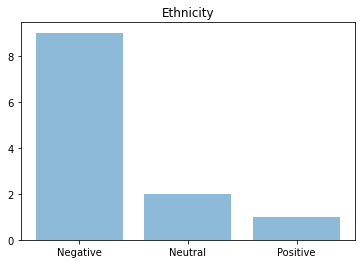

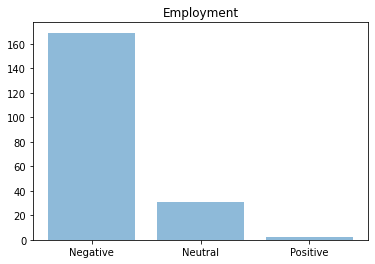

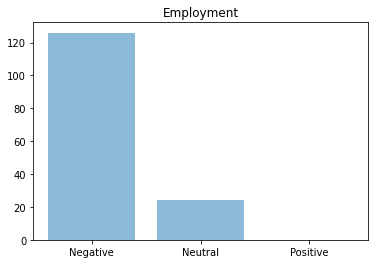

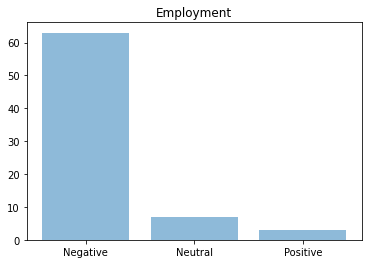

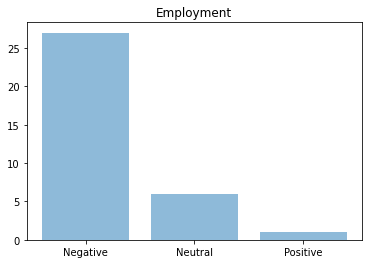

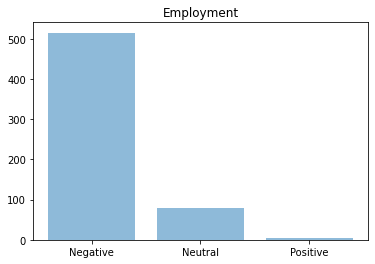

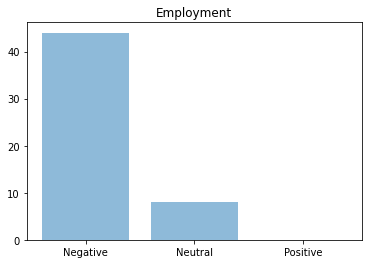

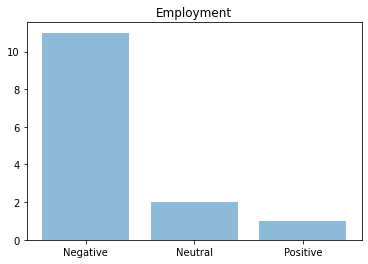

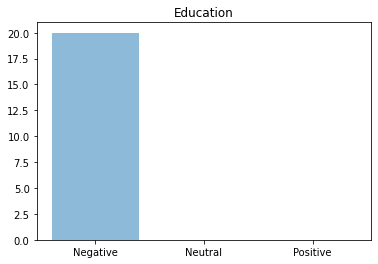

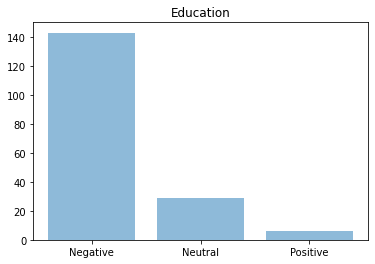

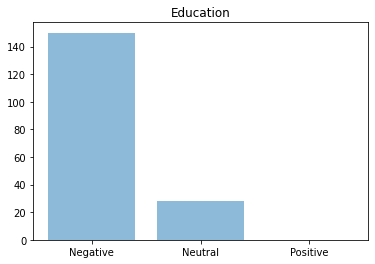

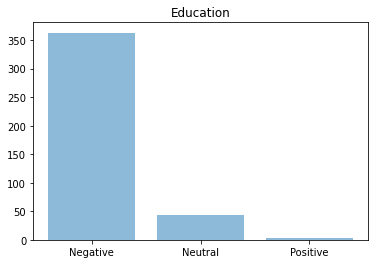

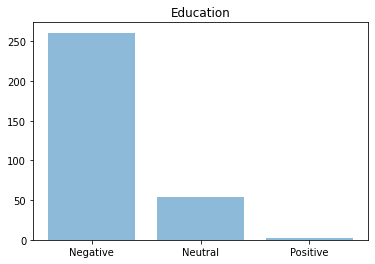

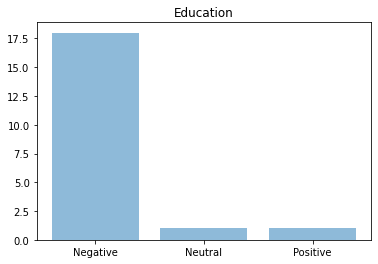

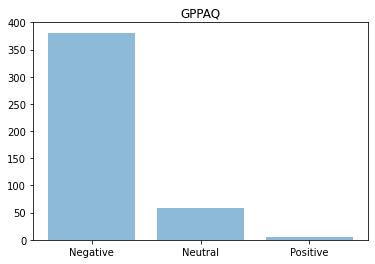

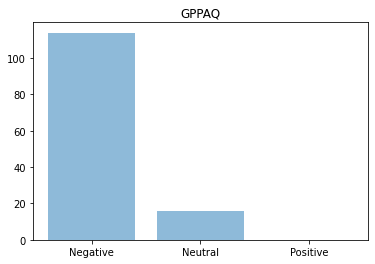

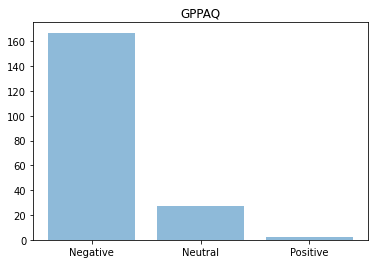

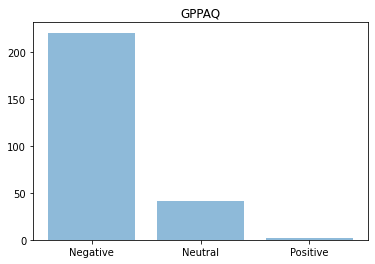

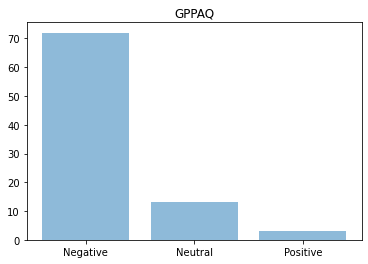

In [ ]:
x_sentiment = ('Negative', 'Neutral', 'Positive') 
titles = ['Age', 'Country','Gender','Ethnicity','Employment','Education','GPPAQ']
P1=0
P2=0
P3=0 
i=0
opt = [5,5,4,11,7,6,5]  
nested[P1][P2][P3]
while i <= 6:
    while P3 < opt[i]:
        plt.title(titles[i])
        plt.bar(x_sentiment,nested[P1][P2][P3], align='center', alpha=0.5)    
        plt.show()
        P3 +=1
    P3=0
    P2 = P2 + 1
    i +=1

# LDA TOPIC MODELLING #

In [ ]:
#Load json file
df = pd.read_json("TextForTopic.json")["texts"]
#Dataframe to list
data = df.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    
data_words = list(sent_to_words(data))

In [ ]:
# Build bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(data_lemmatized[:1])

[['furlough', 'lack', 'work', 'routine', 'leave', 'less', 'motivated', 'lack', 'structure', 'day', 'mean', 'find', 'day', 'waste', 'away', 'however', 'make', 'conscious', 'effort', 'walk', 'find', 'socially', 'distance', 'long', 'mile', 'walk', 'weekend', 'friend', 'do', 'wonder', 'personally']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
#LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,                                           
                                            num_topics=30, 
                                            id2word=id2word,
                                            chunksize=100,
                                            passes=10,
                                            update_every=1,
                                            alpha='auto',
                                            decay=0.9,
                                            random_state=100,
                                            per_word_topics=True)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.173686493820938

Coherence Score:  0.420096283190894


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.242374 -0.168232       1        1  10.635024
7      0.267537  0.128766       2        1   4.913552
18    -0.098265 -0.040311       3        1   4.894009
14     0.052697 -0.015977       4        1   4.876203
0      0.152687 -0.119465       5        1   4.852387
24     0.008177  0.106855       6        1   4.219668
1     -0.014054 -0.220833       7        1   3.918956
25     0.088412  0.143272       8        1   3.791992
22    -0.071515 -0.251323       9        1   3.758764
23     0.137727  0.012880      10        1   3.721704
12     0.071782 -0.025282      11        1   3.242643
27    -0.012399  0.101021      12        1   3.173384
3     -0.007288  0.010913      13        1   3.113768
17     0.045396  0.047996      14        1   3.079269
20    -0.031506 -0.055005      15        1   2.789768
21    -0.071802 -0.010855      16        1   2.741759
2     -0.020860  0.017233      17        1   2.687392
9      0.087695  0.028076      18        1   2.651972
15    -0.031742  0.003574      19        1   2.641476
6     -0.045522  0.087427      20        1   2.629531
4     -0.112997  0.027375      21        1   2.540175
11    -0.046572  0.032873      22        1   2.452591
29    -0.060527  0.081908      23        1   2.424481
13    -0.063272  0.085123      24        1   2.418917
19    -0.051322  0.065997      25        1   2.379096
5     -0.030046 -0.054938      26        1   2.087620
8     -0.093937 -0.014081      27        1   2.053186
10    -0.104389 -0.036290      28        1   1.936513
26    -0.089509  0.017402      29        1   1.891690
28    -0.096961  0.013901      30        1   1.482510, topic_info=           Term        Freq       Total Category  logprob  loglift
367         eat  657.000000  657.000000  Default  30.0000  30.0000
368        food  328.000000  328.000000  Default  29.0000  29.0000
12         less  222.000000  222.000000  Default  28.0000  28.0000
30         home  280.000000  280.000000  Default  27.0000  27.0000
26         work  251.000000  251.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
2082     relied    1.013858    1.900901  Topic30  -5.6684   3.5829
2085   practise    1.013627    1.900922  Topic30  -5.6687   3.5826
174   difficult   21.739908   58.049311  Topic30  -2.6031   3.2293
1515     garden    2.166040    6.218023  Topic30  -4.9093   3.1569
618       email    1.193480    2.709451  Topic30  -5.5053   3.3916

[1137 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
239      29  0.963264  ability
27        4  0.016208     able
27        7  0.850904     able
27        8  0.121558     able
414      11  0.953765   access
...     ...       ...      ...
1448     17  0.961439    wrong
270      14  0.972061     year
753       6  0.911811     yoga
357      20  0.839091    young
435      16  0.917433     zoom

[1211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 8, 19, 15, 1, 25, 2, 26, 23, 24, 13, 28, 4, 18, 21, 22, 3, 10, 16, 7, 5, 12, 30, 14, 20, 6, 9, 11, 27, 29])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

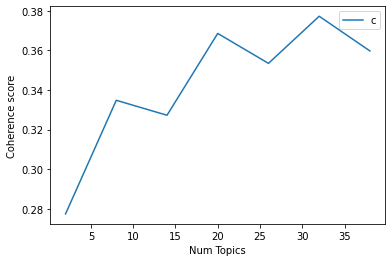

Num Topics = 2  has Coherence Value of 0.2775
Num Topics = 8  has Coherence Value of 0.3348
Num Topics = 14  has Coherence Value of 0.3272
Num Topics = 20  has Coherence Value of 0.3685
Num Topics = 26  has Coherence Value of 0.3534
Num Topics = 32  has Coherence Value of 0.3772
Num Topics = 38  has Coherence Value of 0.3597


In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.4563,"less, eat, time, food, home, supply, work, thi...",Having been on furlough for the majority of th...
1,1,2.0,0.8812,"work, home, pandemic, feel, time, sometimes, m...","Being at home, less able to converse with frie..."
2,2,18.0,0.3889,"lack, go, due, anxiety, normally, problem, eat...",lack of exercise and more sitting
3,3,5.0,0.9500,"less, eat, time, food, home, supply, work, thi...",My wife has had to shield for an extended peri...
4,4,4.0,0.4314,"baking, sick, eater, feel, anxious, boredom, e...",I am a frontline health care worker. Due to st...
5,5,0.0,0.0500,"eat, work, home, day, food, snack, make, alway...",Isolation and lockdown
6,6,14.0,0.6833,"lockdown, eat, food, far, boredom, take, pande...",Not seeing friends
7,7,18.0,0.4923,"lack, go, due, anxiety, normally, problem, eat...",I'm now very isolated and getting a bit forget...
8,8,3.0,0.6161,"eat, food, much, diet, home, choice, comfort, ...",Home schooling 3 kids. Not being able to suppo...
9,9,19.0,0.5418,"increase, eat, food, elderly, live, risk, stom...",Think it has affected me not being able to be ...


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9456,"eat, work, home, day, food, snack, make, alway...",Restriction of movement during lockdown. Start...
1,1.0,0.9568,"eat, cake, lot, comfort, biscuit, boredom, foo...",I’m not snacking but I’m definetly eating more...
2,2.0,0.9604,"work, home, pandemic, feel, time, sometimes, m...",To be honest with you I feel that I casement t...
3,3.0,0.9661,"eat, food, much, diet, home, choice, comfort, ...",my mum got sic with Covid I needed to go abroa...
4,4.0,0.9269,"baking, sick, eater, feel, anxious, boredom, e...",Feeling exhausted and stressed in my professio...


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,5.0,"less, eat, time, food, home, supply, work, thi...",206.0,0.0880
1.0,2.0,"work, home, pandemic, feel, time, sometimes, m...",162.0,0.0692
2.0,18.0,"lack, go, due, anxiety, normally, problem, eat...",140.0,0.0598
3.0,5.0,"less, eat, time, food, home, supply, work, thi...",136.0,0.0581
4.0,4.0,"baking, sick, eater, feel, anxious, boredom, e...",39.0,0.0167
...,...,...,...,...
2336.0,8.0,"time, eat, food, junk, chicken, local, less, b...",NaN,NaN
2337.0,15.0,"eat, stress, sweet, thing, want, worry, able, ...",NaN,NaN
2338.0,10.0,"food, home, snack, meal, eat, time, weight, he...",NaN,NaN
2339.0,10.0,"food, home, snack, meal, eat, time, weight, he...",NaN,NaN
